DATA103 Activity: Feature Selection and Data Handling Methods

Submitted by: Gert Daniel Friborg

To be submitted: October 16, 11:59 PM

# 1. Data Exploration and Preprocessing

In [ ]:
#importing neccessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/GertFriborg/Data/refs/heads/main/DATA103/MBA%20Exercise.csv")
df.head()

,application_id,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,1,Female,False,3.30,Business,Asian,620.0,3.0,Financial Services,Admit
1,2,Male,False,3.28,Humanities,Black,680.0,5.0,Investment Management,NaN
2,3,Female,True,3.30,Business,NaN,710.0,5.0,Technology,Admit
3,4,Male,False,3.47,STEM,Black,690.0,6.0,Technology,NaN
4,5,Male,False,3.35,STEM,Hispanic,590.0,5.0,Consulting,NaN


In [ ]:
df.tail()

,application_id,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
6189,6190,Male,False,3.49,Business,White,640.0,5.0,Other,NaN
6190,6191,Male,False,3.18,STEM,Black,670.0,4.0,Consulting,NaN
6191,6192,Female,True,3.22,Business,NaN,680.0,5.0,Health Care,Admit
6192,6193,Male,True,3.36,Business,NaN,590.0,5.0,Other,NaN
6193,6194,Male,False,3.23,STEM,Hispanic,650.0,4.0,Consulting,NaN


In [ ]:
df = df.drop("application_id", axis =1) # we drop application id as we aren't interested in it
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6194 entries, 0 to 6193
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   gender         6194 non-null   object 
 1   international  6194 non-null   bool   
 2   gpa            6194 non-null   float64
 3   major          6194 non-null   object 
 4   race           4352 non-null   object 
 5   gmat           6194 non-null   float64
 6   work_exp       6194 non-null   float64
 7   work_industry  6194 non-null   object 
 8   admission      1000 non-null   object 
dtypes: bool(1), float64(3), object(5)
memory usage: 393.3+ KB


We see that there are 6194 total observations in the dataset. Some problematic missing columns are admission (only 1000 recorded), and race (4352).


Out of curiosity, let's see the breakdown in the values listed for admission and race

In [ ]:
df["admission"].value_counts()

,count
admission,
Admit,900
Waitlist,100


We see that the only values in the admission column are "Admit" and "Waitlist". It might be so that the missing entries are for those who are denied, meaning they are neither waitlisted nor accepted. Checking the dataset's data dictionary on [kaggle](https://www.kaggle.com/datasets/taweilo/mba-admission-dataset) show that that is the case, Null entries mean Denial. Given so, we will replace all the null columns in the admission column for now.

Additionally, because the missing data is a result of the observation being denied, we will classify the missing admission values as MNAR.

In [ ]:
df["admission"].fillna("Deny", inplace=True)
df["admission"].value_counts()

<ipython-input-6-99e846b610b2>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["admission"].fillna("Deny", inplace=True)


,count
admission,
Deny,5194
Admit,900
Waitlist,100


Next we try address the missing values for the race column.

In [ ]:
print("Unique values for race included are: ",df['race'].unique(),'\n')
print("Number of missing values are:", df['race'].isna().sum(),'\n')
print("Counts per", df["race"].value_counts())

Unique values for race included are:  ['Asian' 'Black' nan 'Hispanic' 'White' 'Other'] 

Number of missing values are: 1842 

Counts per race
White       1456
Asian       1147
Black        916
Hispanic     596
Other        237
Name: count, dtype: int64


We see that there are 1842 missing values for the race column. Because this feature is categorical (and nominal) we can just replace the missing data with the mode of the race column.


The missing race values could be MNAR, as people might be hesistant to include their race as they may believe it could hurt their chances of admisssion due to racism.

In [ ]:
df['race'].fillna(df['race'].mode()[0], inplace=True)
df['race'].value_counts()

<ipython-input-8-890d8f28659f>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['race'].fillna(df['race'].mode()[0], inplace=True)


,count
race,
White,3298
Asian,1147
Black,916
Hispanic,596
Other,237


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6194 entries, 0 to 6193
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   gender         6194 non-null   object 
 1   international  6194 non-null   bool   
 2   gpa            6194 non-null   float64
 3   major          6194 non-null   object 
 4   race           6194 non-null   object 
 5   gmat           6194 non-null   float64
 6   work_exp       6194 non-null   float64
 7   work_industry  6194 non-null   object 
 8   admission      6194 non-null   object 
dtypes: bool(1), float64(3), object(5)
memory usage: 393.3+ KB


Now that all of the data is complete we can make histograms/barplots for each variable to see their distributions.

Stats of gpa
Mean:  3.2507135938004517
Median:  3.25
Mode:  3.24
Max Value:  3.77
Min Value:  2.65


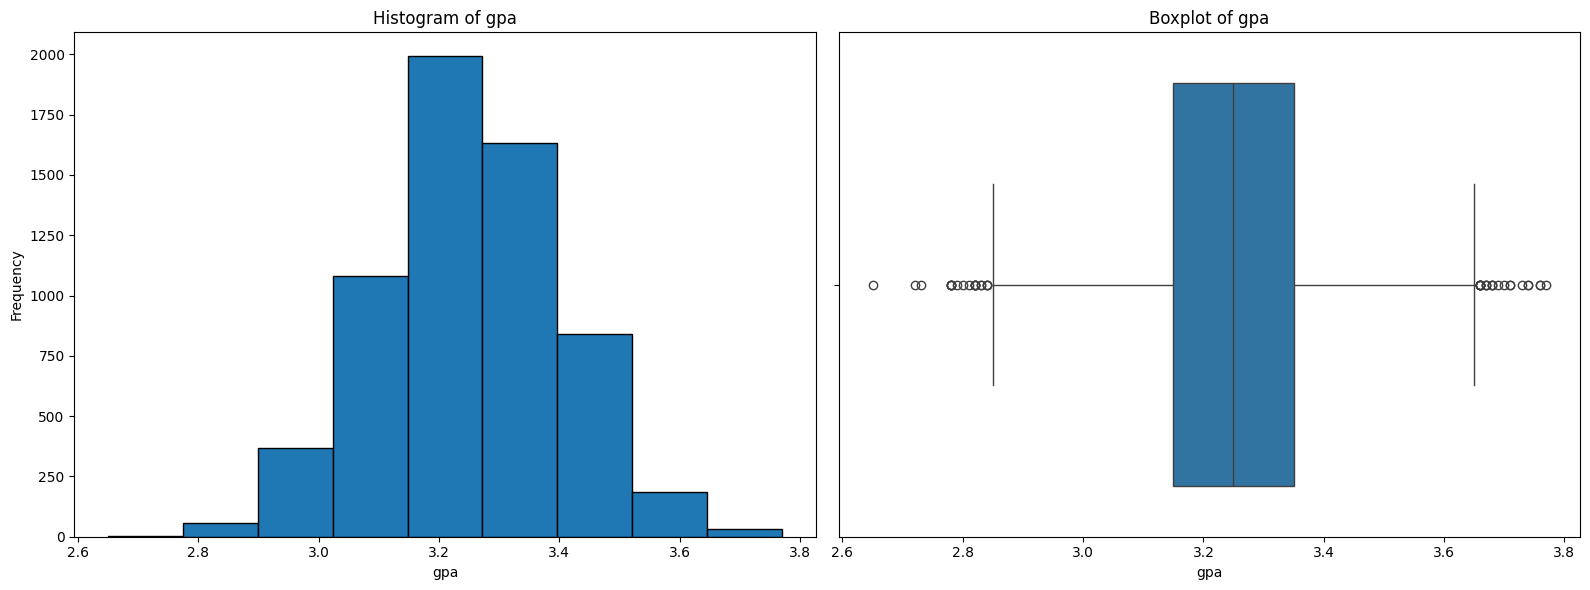


Stats of gmat
Mean:  651.0929932192445
Median:  650.0
Mode:  660.0
Max Value:  780.0
Min Value:  570.0


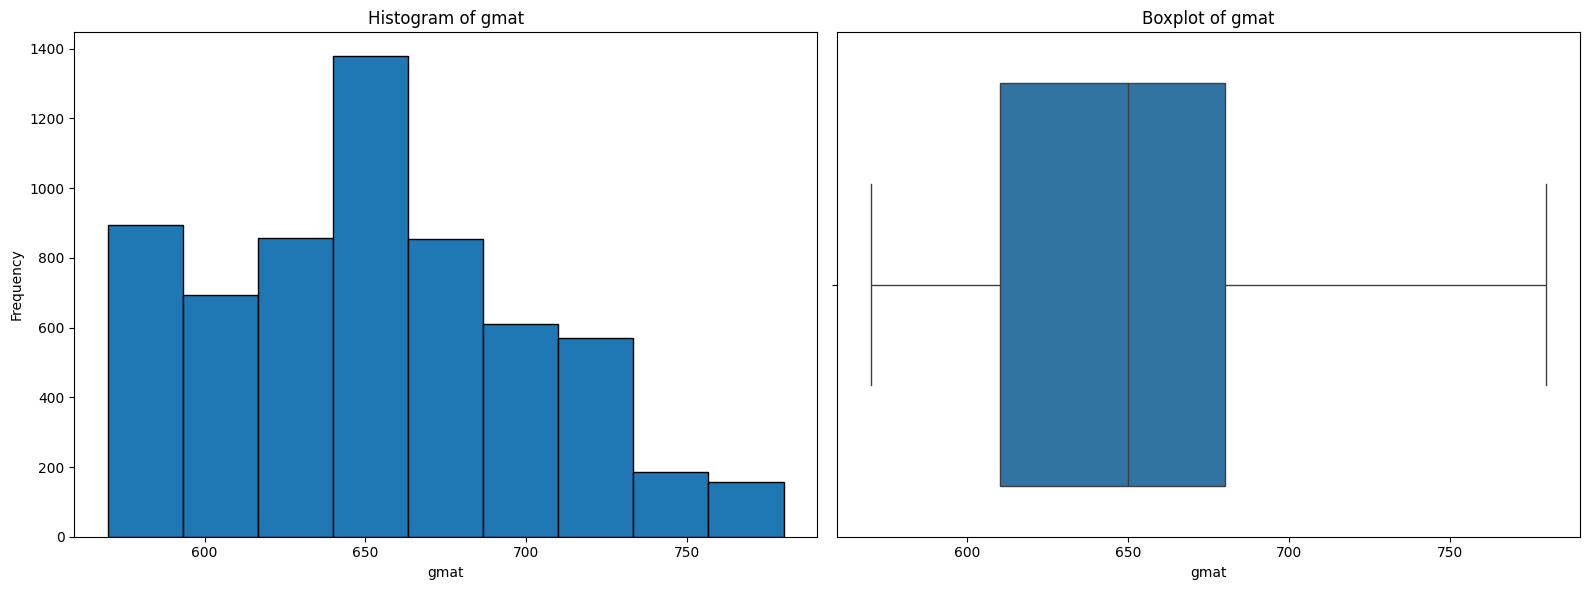


Stats of work_exp
Mean:  5.0169518889247655
Median:  5.0
Mode:  5.0
Max Value:  9.0
Min Value:  1.0


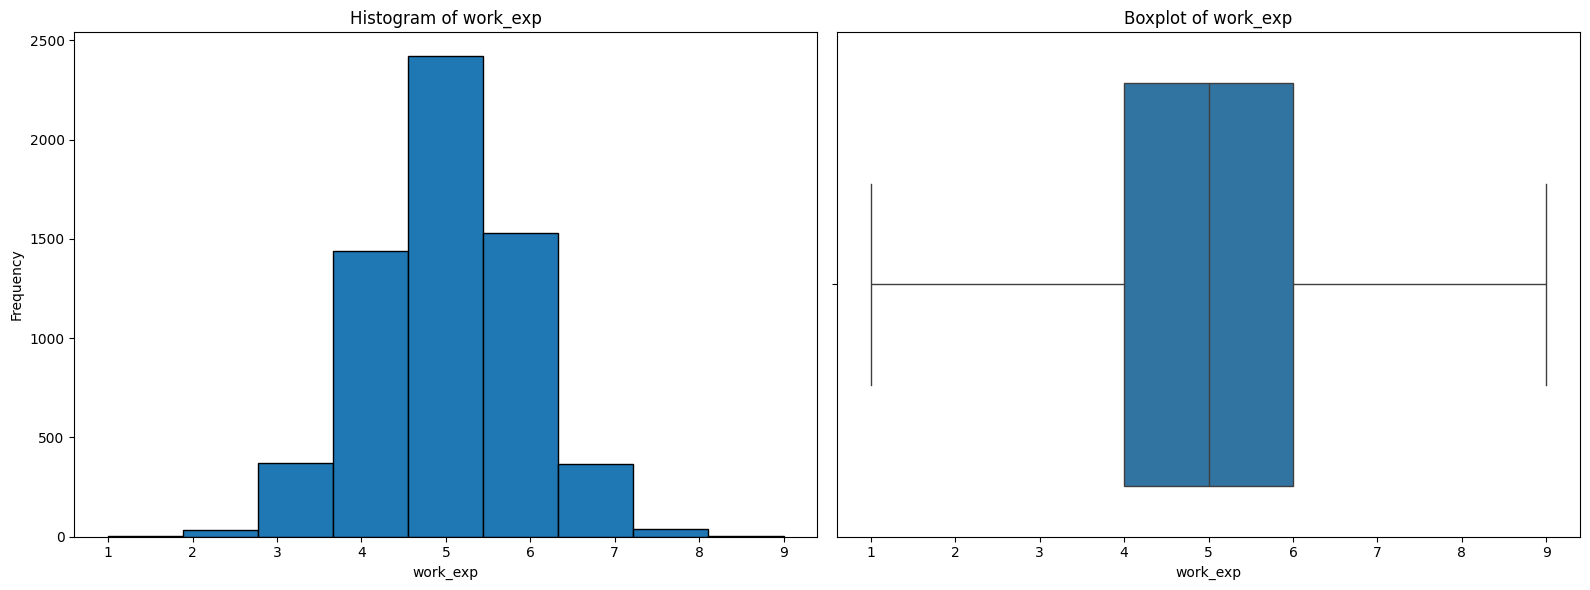

In [ ]:
for column in df.select_dtypes(include=np.number).columns:
    #get mean median mode per each, agg doesnt work bc of mode
    print("Stats of "+ str(column))
    print("Mean: ", df[column].mean())
    print("Median: ", df[column].median())
    print("Mode: ", df[column].mode()[0]) #first mode only
    print("Max Value: ", df[column].max())
    print("Min Value: ", df[column].min())

    #make subplot for bar and hist to be beside each other
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))

    # hist firs t axits
    axes[0].hist(df[column], edgecolor='black', linewidth=1, align='mid', bins=9)
    axes[0].set_title(f'Histogram of {column}')
    axes[0].set_xlabel(column)
    axes[0].set_ylabel('Frequency')
    #box second axis
    sns.boxplot(x=df[column], ax=axes[1])
    axes[1].set_title(f'Boxplot of {column}')
    axes[1].set_xlabel(column)

    plt.tight_layout()

    plt.show()
    print()


We can see that based on the histograms and mean, median, and mode calculated, that work_exp and gpa are approximately normally distributed.

Bsed on the boxplots, we see that gpa might contain multiple outliers. Given that they dont seem to exceed the min and max values for the gpa (0.0-4.0) we will assume that they are merely exceptions and choose to continue to include the outliers in the dataset. Because of the outliers, we will standardize instead of normalize all our numerical variables.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled = scaler.fit_transform(df[['gpa','gmat','work_exp']])
scaled_df = pd.DataFrame(scaled, columns = ['gpa','gmat','work_exp'])
df = df.drop(columns=['gpa','gmat','work_exp'])
df = pd.concat([df, scaled_df], axis=1)
df

,gender,international,major,race,work_industry,admission,gpa,gmat,work_exp
0,Female,False,Business,Asian,Financial Services,Admit,0.325261,-0.630806,-1.953750
1,Male,False,Humanities,Black,Investment Management,Deny,0.193273,0.586457,-0.016421
2,Female,True,Business,White,Technology,Admit,0.325261,1.195089,-0.016421
3,Male,False,STEM,Black,Technology,Deny,1.447159,0.789334,0.952244
4,Male,False,STEM,Hispanic,Consulting,Deny,0.655231,-1.239437,-0.016421
...,...,...,...,...,...,...,...,...,...
6189,Male,False,Business,White,Other,Deny,1.579147,-0.225052,-0.016421
6190,Male,False,STEM,Black,Consulting,Deny,-0.466667,0.383580,-0.985085
6191,Female,True,Business,White,Health Care,Admit,-0.202691,0.586457,-0.016421
6192,Male,True,Business,White,Other,Deny,0.721225,-1.239437,-0.016421


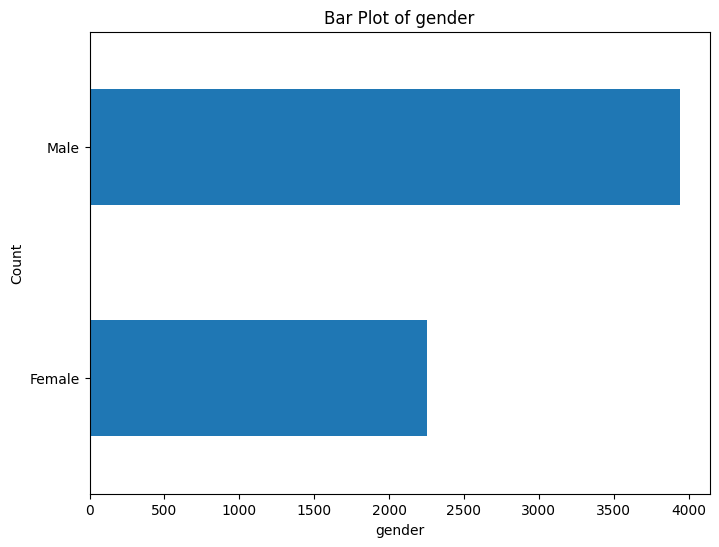

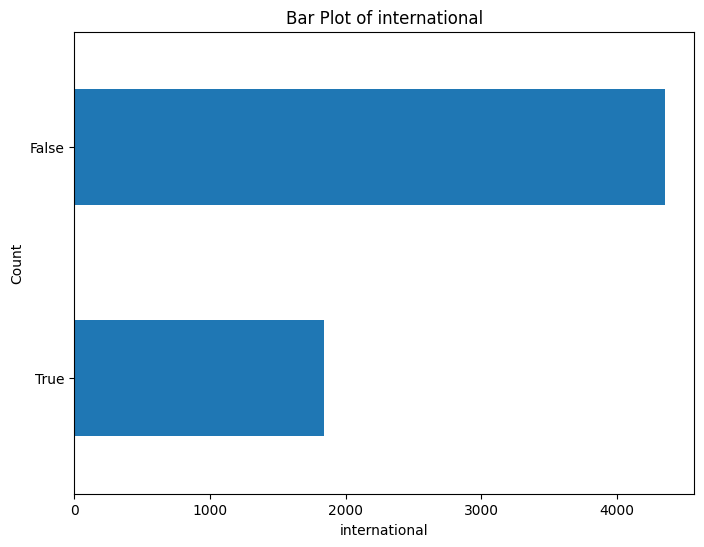

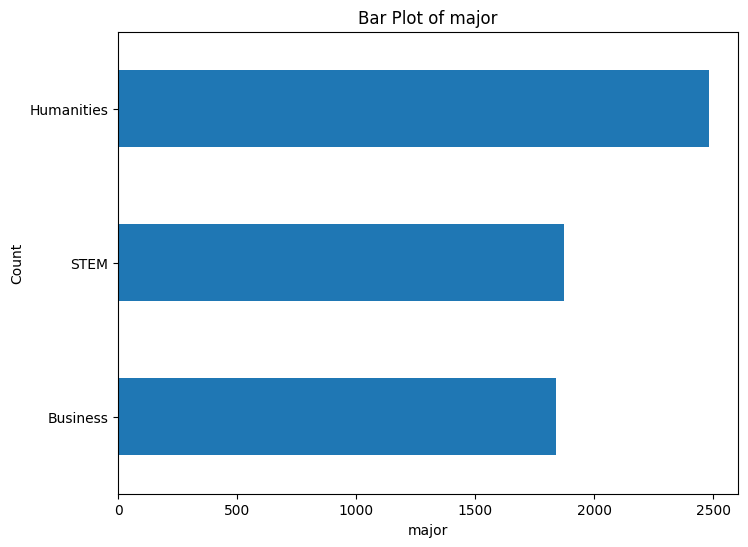

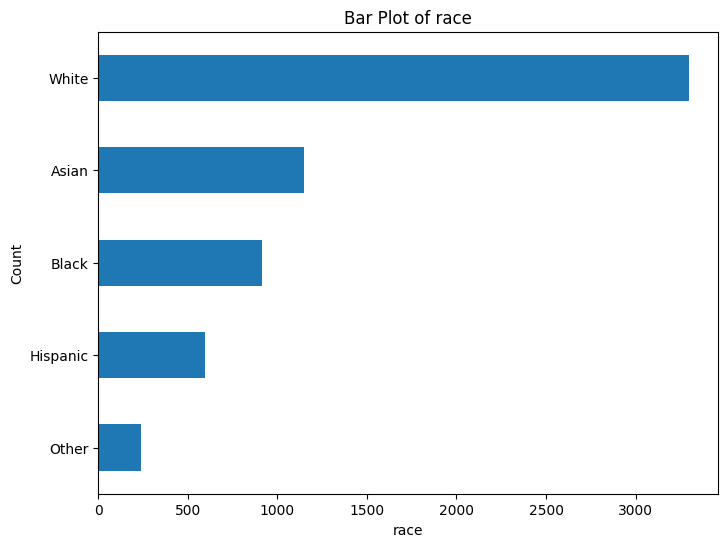

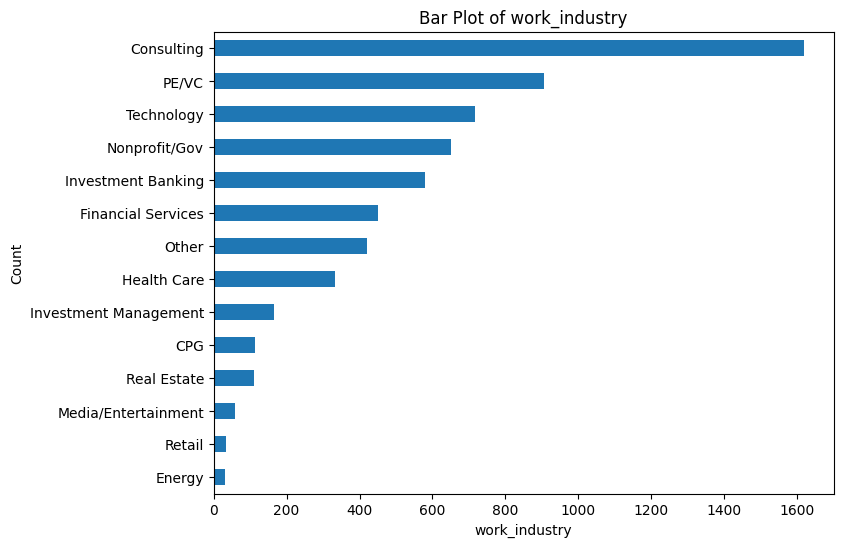

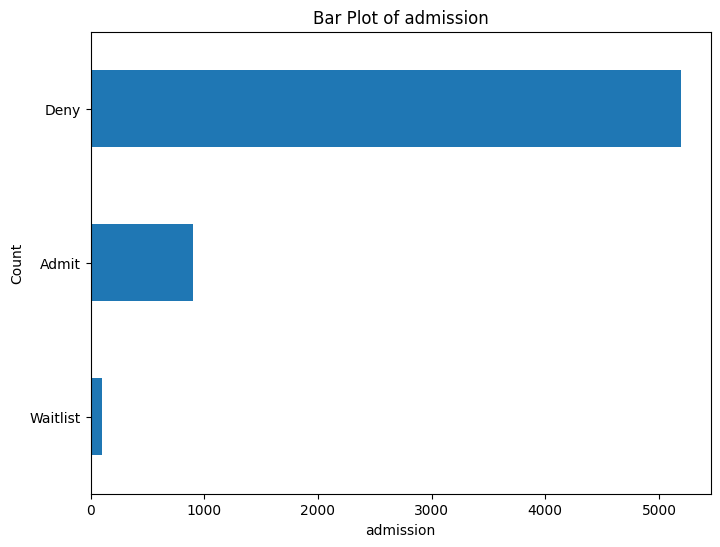

In [ ]:
for column in df.select_dtypes(include=['object', 'category', 'bool']).columns:
    plt.figure(figsize=(8, 6))  # Adjust figure size as needed
    df[column].value_counts().sort_values(ascending=True).plot(kind='barh')
    plt.title(f'Bar Plot of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()
    print()

Now we deal with the categorical values. we want to onehotencode all categorical values.

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
df.select_dtypes(include=['object', 'category', 'bool']).columns #getting the categoical values, not including the target variable admission

Index(['gender', 'international', 'major', 'race', 'work_industry',
       'admission'],
      dtype='object')

In [ ]:
enc = OneHotEncoder(sparse_output=False)
enc.fit(df[["gender", 'international', 'major', 'race', 'work_industry']])
encoded = enc.transform(df[["gender", 'international', 'major', 'race', 'work_industry']])
encoded_df = pd.DataFrame(encoded, columns = enc.get_feature_names_out(["gender", 'international', 'major', 'race', 'work_industry']), index = df.index)

encoded_df.head()

,gender_Female,gender_Male,international_False,international_True,major_Business,major_Humanities,major_STEM,race_Asian,race_Black,race_Hispanic,...,work_industry_Health Care,work_industry_Investment Banking,work_industry_Investment Management,work_industry_Media/Entertainment,work_industry_Nonprofit/Gov,work_industry_Other,work_industry_PE/VC,work_industry_Real Estate,work_industry_Retail,work_industry_Technology
0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#adding the encoded variables back into our main dataset and removing the original categorical variables
df.drop(columns=["gender", 'international', 'major', 'race', 'work_industry'], inplace = True)
df = pd.concat([encoded_df, df],axis=1)
df

,gender_Female,gender_Male,international_False,international_True,major_Business,major_Humanities,major_STEM,race_Asian,race_Black,race_Hispanic,...,work_industry_Nonprofit/Gov,work_industry_Other,work_industry_PE/VC,work_industry_Real Estate,work_industry_Retail,work_industry_Technology,admission,gpa,gmat,work_exp
0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,Admit,0.325261,-0.630806,-1.953750
1,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,Deny,0.193273,0.586457,-0.016421
2,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,Admit,0.325261,1.195089,-0.016421
3,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,Deny,1.447159,0.789334,0.952244
4,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,Deny,0.655231,-1.239437,-0.016421
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6189,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,Deny,1.579147,-0.225052,-0.016421
6190,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,Deny,-0.466667,0.383580,-0.985085
6191,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,Admit,-0.202691,0.586457,-0.016421
6192,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,Deny,0.721225,-1.239437,-0.016421


Converting the admission column into numerical values

In [ ]:
admission_mapping = {
    'Deny': 0,
    'Waitlist': 1,
    'Admit': 2
}

df['admission'] = df['admission'].map(admission_mapping)

df['admission'].value_counts()

,count
admission,
0,5194
2,900
1,100


In [ ]:
df['admission'].value_counts()

,count
admission,
0,5194
2,900
1,100


#2) Feature Selection

##Correlation Matrix

we use spearman correlatin because admission is an ordinal value, and spearman deals with both continous and ordinal. additionally, pearson assumes a linear relationship between variables, which may not be the case.

<Axes: >

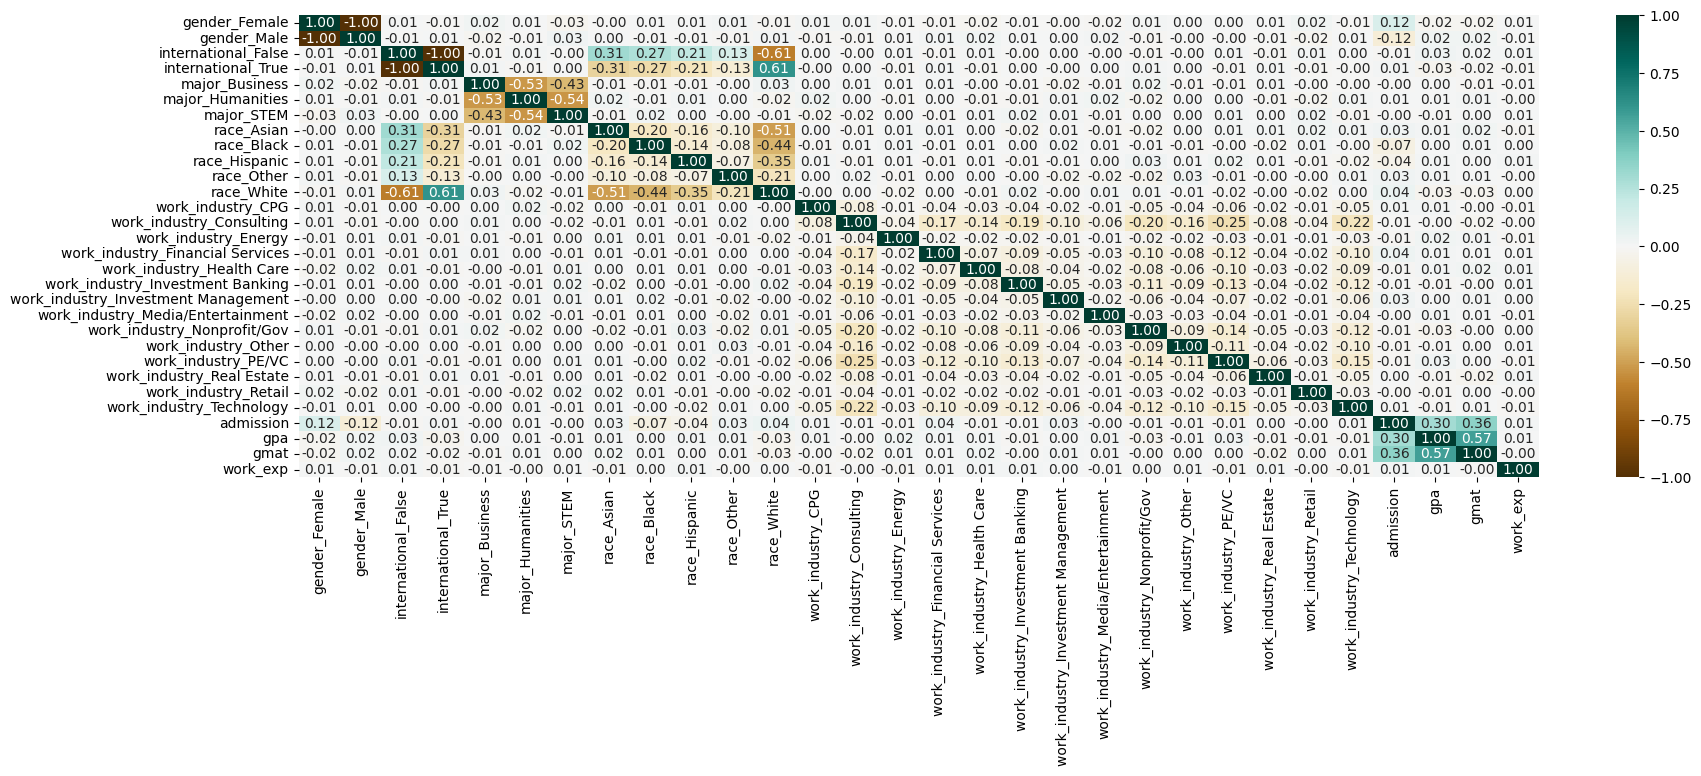

In [ ]:
df_corr=df.corr('spearman')
plt.figure(figsize=(20,6))
sns.heatmap(df_corr, annot=True, fmt='.2f', cmap = 'BrBG')

We see that gpa and gmat are factors that, among the other variables, contribute greatly to one's admission status. Other interesting factors are gender, and race, where the race_black and gender_male features have an inverse relationship with admission.

In [ ]:
corr_target = df_corr.loc[df_corr['admission'].abs() > 0.05, 'admission']
print(corr_target)

important_features = corr_target.index
df[important_features]

gender_Female    0.124426
gender_Male     -0.124426
race_Black      -0.071649
admission        1.000000
gpa              0.300288
gmat             0.360311
Name: admission, dtype: float64


,gender_Female,gender_Male,race_Black,admission,gpa,gmat
0,1.0,0.0,0.0,2,0.325261,-0.630806
1,0.0,1.0,1.0,0,0.193273,0.586457
2,1.0,0.0,0.0,2,0.325261,1.195089
3,0.0,1.0,1.0,0,1.447159,0.789334
4,0.0,1.0,0.0,0,0.655231,-1.239437
...,...,...,...,...,...,...
6189,0.0,1.0,0.0,0,1.579147,-0.225052
6190,0.0,1.0,1.0,0,-0.466667,0.383580
6191,1.0,0.0,0.0,2,-0.202691,0.586457
6192,0.0,1.0,0.0,0,0.721225,-1.239437


We will not drop correlated features as many of our variables are on-hot encoded, and as a result will have an inverse relationship with other onehot encoded variables under the same original category.

##Sequential Feature Selector

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('admission', axis=1),df['admission'], test_size=0.2, random_state=42)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
sfs = SequentialFeatureSelector(knn, n_features_to_select=6) #let's just settle with 6 features
sfs.fit(X_train,y_train)
features = X_train.columns[sfs.get_support()]


In [ ]:
X_train.columns

Index(['gender_Female', 'gender_Male', 'international_False',
       'international_True', 'major_Business', 'major_Humanities',
       'major_STEM', 'race_Asian', 'race_Black', 'race_Hispanic', 'race_Other',
       'race_White', 'work_industry_CPG', 'work_industry_Consulting',
       'work_industry_Energy', 'work_industry_Financial Services',
       'work_industry_Health Care', 'work_industry_Investment Banking',
       'work_industry_Investment Management',
       'work_industry_Media/Entertainment', 'work_industry_Nonprofit/Gov',
       'work_industry_Other', 'work_industry_PE/VC',
       'work_industry_Real Estate', 'work_industry_Retail',
       'work_industry_Technology', 'gpa', 'gmat', 'work_exp'],
      dtype='object')

In [ ]:
sfs.get_support()

array([False,  True, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
        True, False,  True, False, False, False, False, False,  True,
        True, False])

We will base our dataset features on the resutls of the correlation matrix as we will trust on the mathematical result of the correlation scores.

#3) Handling imbalanced features

## Using Smote_NC (Over Sampling)
We use Smote_NC instead of normal smote as our target variable ordinal. Smote_NC is able to handle nominal and continous variables. In our case, it treats the ordinal data as nomial.

In [ ]:
df[important_features]

,gender_Female,gender_Male,race_Black,admission,gpa,gmat
0,1.0,0.0,0.0,2,0.325261,-0.630806
1,0.0,1.0,1.0,0,0.193273,0.586457
2,1.0,0.0,0.0,2,0.325261,1.195089
3,0.0,1.0,1.0,0,1.447159,0.789334
4,0.0,1.0,0.0,0,0.655231,-1.239437
...,...,...,...,...,...,...
6189,0.0,1.0,0.0,0,1.579147,-0.225052
6190,0.0,1.0,1.0,0,-0.466667,0.383580
6191,1.0,0.0,0.0,2,-0.202691,0.586457
6192,0.0,1.0,0.0,0,0.721225,-1.239437


In [ ]:
df_imbalanced_1 = df[important_features].copy()
df_imbalanced_2 = df[important_features].copy()

from imblearn.over_sampling import SMOTENC

cat_features = list(range(4)) #our categorical values are in the positions 0-4, inclucive of admission

smote_nc = SMOTENC(categorical_features = cat_features, random_state=42)

x_resample, y_resample = smote_nc.fit_resample(df_imbalanced_1.drop('admission', axis = 1), df_imbalanced_1['admission'])

y_resample = pd.DataFrame(y_resample, columns=['admission'])

df_balanced1 = pd.concat([x_resample, y_resample], axis=1)


In [ ]:
print(df_balanced1['admission'].value_counts())
df_balanced1

admission
2    5194
0    5194
1    5194
Name: count, dtype: int64


,gender_Female,gender_Male,race_Black,gpa,gmat,admission
0,1.0,0.0,0.0,0.325261,-0.630806,2
1,0.0,1.0,1.0,0.193273,0.586457,0
2,1.0,0.0,0.0,0.325261,1.195089,2
3,0.0,1.0,1.0,1.447159,0.789334,0
4,0.0,1.0,0.0,0.655231,-1.239437,0
...,...,...,...,...,...,...
15577,1.0,0.0,0.0,0.589237,1.189567,2
15578,0.0,1.0,0.0,0.721225,0.992212,2
15579,0.0,1.0,0.0,0.391255,0.936180,2
15580,0.0,1.0,0.0,0.259267,1.195089,2


##Using RandomUnderSampler (Under Sampling)

In [ ]:
df_imbalanced_2['admission'].value_counts()

,count
admission,
0,5194
2,900
1,100


Now let us use random undersampler to undersample the data and set all the counts per admission to 100

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

#because we have 3 categories, we need to adjust and specify the sampling strategy
sampling = {
    0:100,
    1:100,
    2:100
}

undersample = RandomUnderSampler(sampling_strategy = sampling, random_state=42)

X_under, y_under = undersample.fit_resample(df_imbalanced_2.drop('admission', axis = 1), df_imbalanced_2['admission'])

y_under = pd.DataFrame(y_under, columns=['admission'])

df_balanced2 = pd.concat([X_under, y_under], axis=1)


In [ ]:
df_balanced2['admission'].value_counts()

,count
admission,
0,100
1,100
2,100


In [ ]:
df_balanced2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 300 entries, 4301 to 119
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   gender_Female  300 non-null    float64
 1   gender_Male    300 non-null    float64
 2   race_Black     300 non-null    float64
 3   gpa            300 non-null    float64
 4   gmat           300 non-null    float64
 5   admission      300 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 16.4 KB


#4) BONUS: Model Building and Evaluation

Now we have 3 datasets, df, df_balanced1, df_balanced2.

* df: original dataset
* df_balanced1: oversampled dataset with importand features
* df_balanced2: undersampled dataset with important features

We will implement a classification model based on df_balanced1 and df_balanced2 and compare the between the 2 using the appropriate metrics.

Let us implement svm as being able to handle high dimensionality datasets will be useful in our model implementation for our original dataset which has 30 features. Additionally, it can handle multiclass claassification as long as we specify the appropriate kernel to be used, whether that be rbf or polynomial.


A drawback of SVM is that it is sensitive to feature scaling, which will not be a problem in this case as we have already standardized the dataset. Another drawback is that it is sensitve to class imbalances, which may impact the prrfomance for the model using the orginal dataset, but not data_balanced1 and data_balanced2, as the imbalances have been addressed by SMOTE_NC and randomundersampler.

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import precision_score, recall_score, f1_score, r2_score, accuracy_score

In [ ]:
print(df_balanced1.info())
print(df_balanced2.info())
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15582 entries, 0 to 15581
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   gender_Female  15582 non-null  float64
 1   gender_Male    15582 non-null  float64
 2   race_Black     15582 non-null  float64
 3   gpa            15582 non-null  float64
 4   gmat           15582 non-null  float64
 5   admission      15582 non-null  int64  
dtypes: float64(5), int64(1)
memory usage: 730.5 KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 300 entries, 4301 to 119
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   gender_Female  300 non-null    float64
 1   gender_Male    300 non-null    float64
 2   race_Black     300 non-null    float64
 3   gpa            300 non-null    float64
 4   gmat           300 non-null    float64
 5   admission      300 non-null    int64  
dtypes: float64(5), int64(1)


In [ ]:
#1 for oversample,2 for under, no number for original
X_train, X_test, y_train, y_test = train_test_split(df.drop('admission', axis=1, inplace=False), df['admission'],test_size=0.2, random_state=42)
X_train1, X_test1, y_train1, y_test1 = train_test_split(df_balanced1.drop('admission', axis=1, inplace=False), df_balanced1['admission'],test_size=0.2, random_state=42)
X_train2, X_test2, y_train2, y_test2 = train_test_split(df_balanced2.drop('admission', axis=1, inplace = False), df_balanced2['admission'],test_size=0.2, random_state=42)

In [ ]:
param_grid = {
    'C' : [0.1,0.001,10,100],
    'kernel': ['rbf','polynomial'] # we use only rbf and polymonial since we have 3 diff classes
}

scorer = {
    'precision_score': make_scorer(precision_score),
    'recall_score': make_scorer(recall_score),
    'accuracy_score': make_scorer(accuracy_score),
    'f1_score': make_scorer(f1_score)
}

clf_grid = GridSearchCV(SVC(), param_grid, scoring=scorer, cv=5, refit='f1_score', verbose = 3) #choose refit to prioritize f1 results
clf_grid.fit(X_train1, y_train1)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:1000: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 139, in __call__
    score = scorer._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 213, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py", line 2204, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 186, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/l

[CV 1/5] END C=0.1, kernel=rbf; accuracy_score: (test=0.645) f1_score: (test=nan) precision_score: (test=nan) recall_score: (test=nan) total time=   6.0s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:1000: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 139, in __call__
    score = scorer._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 213, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py", line 2204, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 186, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/l

[CV 2/5] END C=0.1, kernel=rbf; accuracy_score: (test=0.635) f1_score: (test=nan) precision_score: (test=nan) recall_score: (test=nan) total time=   8.0s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:1000: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 139, in __call__
    score = scorer._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 213, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py", line 2204, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 186, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/l

[CV 3/5] END C=0.1, kernel=rbf; accuracy_score: (test=0.596) f1_score: (test=nan) precision_score: (test=nan) recall_score: (test=nan) total time=   5.8s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:1000: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 139, in __call__
    score = scorer._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 213, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py", line 2204, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 186, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/l

[CV 4/5] END C=0.1, kernel=rbf; accuracy_score: (test=0.602) f1_score: (test=nan) precision_score: (test=nan) recall_score: (test=nan) total time=   7.8s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:1000: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 139, in __call__
    score = scorer._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 213, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py", line 2204, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 186, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/l

[CV 5/5] END C=0.1, kernel=rbf; accuracy_score: (test=0.647) f1_score: (test=nan) precision_score: (test=nan) recall_score: (test=nan) total time=   6.6s
[CV 1/5] END C=0.1, kernel=polynomial; accuracy_score: (test=nan) f1_score: (test=nan) precision_score: (test=nan) recall_score: (test=nan) total time=   0.0s
[CV 2/5] END C=0.1, kernel=polynomial; accuracy_score: (test=nan) f1_score: (test=nan) precision_score: (test=nan) recall_score: (test=nan) total time=   0.0s
[CV 3/5] END C=0.1, kernel=polynomial; accuracy_score: (test=nan) f1_score: (test=nan) precision_score: (test=nan) recall_score: (test=nan) total time=   0.0s
[CV 4/5] END C=0.1, kernel=polynomial; accuracy_score: (test=nan) f1_score: (test=nan) precision_score: (test=nan) recall_score: (test=nan) total time=   0.0s
[CV 5/5] END C=0.1, kernel=polynomial; accuracy_score: (test=nan) f1_score: (test=nan) precision_score: (test=nan) recall_score: (test=nan) total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:1000: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 139, in __call__
    score = scorer._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 213, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py", line 2204, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 186, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/l

[CV 1/5] END C=0.001, kernel=rbf; accuracy_score: (test=0.518) f1_score: (test=nan) precision_score: (test=nan) recall_score: (test=nan) total time=  10.4s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:1000: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 139, in __call__
    score = scorer._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 213, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py", line 2204, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 186, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/l

[CV 2/5] END C=0.001, kernel=rbf; accuracy_score: (test=0.517) f1_score: (test=nan) precision_score: (test=nan) recall_score: (test=nan) total time=   8.5s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:1000: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 139, in __call__
    score = scorer._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 213, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py", line 2204, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 186, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/l

[CV 3/5] END C=0.001, kernel=rbf; accuracy_score: (test=0.512) f1_score: (test=nan) precision_score: (test=nan) recall_score: (test=nan) total time=  10.3s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:1000: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 139, in __call__
    score = scorer._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 213, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py", line 2204, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 186, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/l

[CV 4/5] END C=0.001, kernel=rbf; accuracy_score: (test=0.513) f1_score: (test=nan) precision_score: (test=nan) recall_score: (test=nan) total time=  10.6s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:1000: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 139, in __call__
    score = scorer._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 213, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py", line 2204, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 186, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/l

[CV 5/5] END C=0.001, kernel=rbf; accuracy_score: (test=0.522) f1_score: (test=nan) precision_score: (test=nan) recall_score: (test=nan) total time=   8.4s
[CV 1/5] END C=0.001, kernel=polynomial; accuracy_score: (test=nan) f1_score: (test=nan) precision_score: (test=nan) recall_score: (test=nan) total time=   0.0s
[CV 2/5] END C=0.001, kernel=polynomial; accuracy_score: (test=nan) f1_score: (test=nan) precision_score: (test=nan) recall_score: (test=nan) total time=   0.0s
[CV 3/5] END C=0.001, kernel=polynomial; accuracy_score: (test=nan) f1_score: (test=nan) precision_score: (test=nan) recall_score: (test=nan) total time=   0.0s
[CV 4/5] END C=0.001, kernel=polynomial; accuracy_score: (test=nan) f1_score: (test=nan) precision_score: (test=nan) recall_score: (test=nan) total time=   0.0s
[CV 5/5] END C=0.001, kernel=polynomial; accuracy_score: (test=nan) f1_score: (test=nan) precision_score: (test=nan) recall_score: (test=nan) total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:1000: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 139, in __call__
    score = scorer._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 213, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py", line 2204, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 186, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/l

[CV 1/5] END C=10, kernel=rbf; accuracy_score: (test=0.684) f1_score: (test=nan) precision_score: (test=nan) recall_score: (test=nan) total time=   9.2s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:1000: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 139, in __call__
    score = scorer._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 213, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py", line 2204, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 186, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/l

[CV 2/5] END C=10, kernel=rbf; accuracy_score: (test=0.675) f1_score: (test=nan) precision_score: (test=nan) recall_score: (test=nan) total time=   7.2s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:1000: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 139, in __call__
    score = scorer._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 213, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py", line 2204, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 186, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/l

[CV 3/5] END C=10, kernel=rbf; accuracy_score: (test=0.669) f1_score: (test=nan) precision_score: (test=nan) recall_score: (test=nan) total time=   9.0s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:1000: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 139, in __call__
    score = scorer._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 213, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py", line 2204, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 186, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/l

[CV 4/5] END C=10, kernel=rbf; accuracy_score: (test=0.666) f1_score: (test=nan) precision_score: (test=nan) recall_score: (test=nan) total time=   7.9s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:1000: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 139, in __call__
    score = scorer._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 213, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py", line 2204, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 186, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/l

[CV 5/5] END C=10, kernel=rbf; accuracy_score: (test=0.691) f1_score: (test=nan) precision_score: (test=nan) recall_score: (test=nan) total time=   8.7s
[CV 1/5] END C=10, kernel=polynomial; accuracy_score: (test=nan) f1_score: (test=nan) precision_score: (test=nan) recall_score: (test=nan) total time=   0.0s
[CV 2/5] END C=10, kernel=polynomial; accuracy_score: (test=nan) f1_score: (test=nan) precision_score: (test=nan) recall_score: (test=nan) total time=   0.0s
[CV 3/5] END C=10, kernel=polynomial; accuracy_score: (test=nan) f1_score: (test=nan) precision_score: (test=nan) recall_score: (test=nan) total time=   0.0s
[CV 4/5] END C=10, kernel=polynomial; accuracy_score: (test=nan) f1_score: (test=nan) precision_score: (test=nan) recall_score: (test=nan) total time=   0.0s
[CV 5/5] END C=10, kernel=polynomial; accuracy_score: (test=nan) f1_score: (test=nan) precision_score: (test=nan) recall_score: (test=nan) total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:1000: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 139, in __call__
    score = scorer._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 213, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py", line 2204, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 186, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/l

[CV 1/5] END C=100, kernel=rbf; accuracy_score: (test=0.697) f1_score: (test=nan) precision_score: (test=nan) recall_score: (test=nan) total time=  16.3s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:1000: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 139, in __call__
    score = scorer._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 213, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py", line 2204, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 186, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/l

[CV 2/5] END C=100, kernel=rbf; accuracy_score: (test=0.700) f1_score: (test=nan) precision_score: (test=nan) recall_score: (test=nan) total time=  15.6s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:1000: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 139, in __call__
    score = scorer._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 213, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py", line 2204, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 186, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/l

[CV 3/5] END C=100, kernel=rbf; accuracy_score: (test=0.691) f1_score: (test=nan) precision_score: (test=nan) recall_score: (test=nan) total time=  15.6s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:1000: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 139, in __call__
    score = scorer._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 213, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py", line 2204, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 186, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/l

[CV 4/5] END C=100, kernel=rbf; accuracy_score: (test=0.685) f1_score: (test=nan) precision_score: (test=nan) recall_score: (test=nan) total time=  15.6s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:1000: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 139, in __call__
    score = scorer._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 213, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py", line 2204, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 186, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/l

[CV 5/5] END C=100, kernel=rbf; accuracy_score: (test=0.710) f1_score: (test=nan) precision_score: (test=nan) recall_score: (test=nan) total time=  15.3s
[CV 1/5] END C=100, kernel=polynomial; accuracy_score: (test=nan) f1_score: (test=nan) precision_score: (test=nan) recall_score: (test=nan) total time=   0.0s
[CV 2/5] END C=100, kernel=polynomial; accuracy_score: (test=nan) f1_score: (test=nan) precision_score: (test=nan) recall_score: (test=nan) total time=   0.0s
[CV 3/5] END C=100, kernel=polynomial; accuracy_score: (test=nan) f1_score: (test=nan) precision_score: (test=nan) recall_score: (test=nan) total time=   0.0s
[CV 4/5] END C=100, kernel=polynomial; accuracy_score: (test=nan) f1_score: (test=nan) precision_score: (test=nan) recall_score: (test=nan) total time=   0.0s
[CV 5/5] END C=100, kernel=polynomial; accuracy_score: (test=nan) f1_score: (test=nan) precision_score: (test=nan) recall_score: (test=nan) total time=   0.0s


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 0.001, 10, 100],
                         'kernel': ['rbf', 'polynomial']},
             refit='f1_score',
             scoring={'accuracy_score': make_scorer(accuracy_score, response_method='predict'),
                      'f1_score': make_scorer(f1_score, response_method='predict'),
                      'precision_score': make_scorer(precision_score, response_method='predict'),
                      'recall_score': make_scorer(recall_score, response_method='predict')},
             verbose=3)

In [ ]:
print(clf_grid.best_estimator_)
clf_grid.best_estimator_.fit(X_train1,y_train1)

SVC(C=0.1)


SVC(C=0.1)

In [ ]:
y_pred1 = clf_grid.best_estimator_.predict(X_test1)
print(f"Accuracy = {clf_grid.best_estimator_.score(X_test1, y_test1)}")
print(f"Precision = {precision_score(y_test1, y_pred1, average='weighted', zero_division=0)}")
print(f"Recall = {recall_score(y_test1, y_pred1, average='weighted', zero_division=0)}")
print(f"F1 Score = {f1_score(y_test1, y_pred1, average='weighted', zero_division=0)}")

Accuracy = 0.6265640038498557
Precision = 0.6699371980680229
Recall = 0.6265640038498557
F1 Score = 0.6328619266972039


For df_balanced2

In [ ]:
clf_grid = GridSearchCV(SVC(), param_grid, scoring=scorer, cv=5, refit='f1_score', verbose = 3)
clf_grid.fit(X_train2, y_train2)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END C=0.1, kernel=rbf; accuracy_score: (test=0.417) f1_score: (test=nan) precision_score: (test=nan) recall_score: (test=nan) total time=   0.0s
[CV 2/5] END C=0.1, kernel=rbf; accuracy_score: (test=0.458) f1_score: (test=nan) precision_score: (test=nan) recall_score: (test=nan) total time=   0.0s
[CV 3/5] END C=0.1, kernel=rbf; accuracy_score: (test=0.417) f1_score: (test=nan) precision_score: (test=nan) recall_score: (test=nan) total time=   0.0s
[CV 4/5] END C=0.1, kernel=rbf; accuracy_score: (test=0.479) f1_score: (test=nan) precision_score: (test=nan) recall_score: (test=nan) total time=   0.0s
[CV 5/5] END C=0.1, kernel=rbf; accuracy_score: (test=0.333) f1_score: (test=nan) precision_score: (test=nan) recall_score: (test=nan) total time=   0.0s
[CV 1/5] END C=0.1, kernel=polynomial; accuracy_score: (test=nan) f1_score: (test=nan) precision_score: (test=nan) recall_score: (test=nan) total time=   0.0s
[CV 2/5] EN

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:1000: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 139, in __call__
    score = scorer._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 213, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py", line 2204, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 186, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/l

[CV 4/5] END C=0.001, kernel=rbf; accuracy_score: (test=0.354) f1_score: (test=nan) precision_score: (test=nan) recall_score: (test=nan) total time=   0.0s
[CV 5/5] END C=0.001, kernel=rbf; accuracy_score: (test=0.354) f1_score: (test=nan) precision_score: (test=nan) recall_score: (test=nan) total time=   0.0s
[CV 1/5] END C=0.001, kernel=polynomial; accuracy_score: (test=nan) f1_score: (test=nan) precision_score: (test=nan) recall_score: (test=nan) total time=   0.0s
[CV 2/5] END C=0.001, kernel=polynomial; accuracy_score: (test=nan) f1_score: (test=nan) precision_score: (test=nan) recall_score: (test=nan) total time=   0.0s
[CV 3/5] END C=0.001, kernel=polynomial; accuracy_score: (test=nan) f1_score: (test=nan) precision_score: (test=nan) recall_score: (test=nan) total time=   0.0s
[CV 4/5] END C=0.001, kernel=polynomial; accuracy_score: (test=nan) f1_score: (test=nan) precision_score: (test=nan) recall_score: (test=nan) total time=   0.0s
[CV 5/5] END C=0.001, kernel=polynomial; acc

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:1000: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 139, in __call__
    score = scorer._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 213, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py", line 2204, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 186, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/l

[CV 1/5] END C=100, kernel=rbf; accuracy_score: (test=0.396) f1_score: (test=nan) precision_score: (test=nan) recall_score: (test=nan) total time=   0.0s
[CV 2/5] END C=100, kernel=rbf; accuracy_score: (test=0.500) f1_score: (test=nan) precision_score: (test=nan) recall_score: (test=nan) total time=   0.0s
[CV 3/5] END C=100, kernel=rbf; accuracy_score: (test=0.375) f1_score: (test=nan) precision_score: (test=nan) recall_score: (test=nan) total time=   0.0s
[CV 4/5] END C=100, kernel=rbf; accuracy_score: (test=0.646) f1_score: (test=nan) precision_score: (test=nan) recall_score: (test=nan) total time=   0.0s
[CV 5/5] END C=100, kernel=rbf; accuracy_score: (test=0.458) f1_score: (test=nan) precision_score: (test=nan) recall_score: (test=nan) total time=   0.0s
[CV 1/5] END C=100, kernel=polynomial; accuracy_score: (test=nan) f1_score: (test=nan) precision_score: (test=nan) recall_score: (test=nan) total time=   0.0s
[CV 2/5] END C=100, kernel=polynomial; accuracy_score: (test=nan) f1_sc

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:1000: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 139, in __call__
    score = scorer._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 213, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py", line 2204, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 186, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/l

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 0.001, 10, 100],
                         'kernel': ['rbf', 'polynomial']},
             refit='f1_score',
             scoring={'accuracy_score': make_scorer(accuracy_score, response_method='predict'),
                      'f1_score': make_scorer(f1_score, response_method='predict'),
                      'precision_score': make_scorer(precision_score, response_method='predict'),
                      'recall_score': make_scorer(recall_score, response_method='predict')},
             verbose=3)

In [ ]:
print(clf_grid.best_estimator_)
clf_grid.best_estimator_.fit(X_train2,y_train2)

SVC(C=0.1)


SVC(C=0.1)

In [ ]:
y_pred2 = clf_grid.best_estimator_.predict(X_test2)
print(f"Accuracy {clf_grid.best_estimator_.score(X_test2, y_test2)}")
print(f"Precision = {precision_score(y_test2, y_pred2, average='weighted', zero_division=0)}")
print(f"Recall = {recall_score(y_test2, y_pred2, average='weighted', zero_division=0)}")
print(f"F1 Score = {f1_score(y_test2, y_pred2, average='weighted', zero_division=0)}")

Accuracy 0.4166666666666667
Precision = 0.5615151515151514
Recall = 0.4166666666666667
F1 Score = 0.3863492063492064


For original dataset

In [ ]:
clf_grid = GridSearchCV(SVC(), param_grid, scoring=scorer, cv=5, refit='f1_score', verbose = 3)
clf_grid.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:1000: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 139, in __call__
    score = scorer._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 213, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py", line 2204, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 186, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/l

[CV 1/5] END C=0.1, kernel=rbf; accuracy_score: (test=0.842) f1_score: (test=nan) precision_score: (test=nan) recall_score: (test=nan) total time=   1.1s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:1000: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 139, in __call__
    score = scorer._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 213, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py", line 2204, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 186, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/l

[CV 2/5] END C=0.1, kernel=rbf; accuracy_score: (test=0.842) f1_score: (test=nan) precision_score: (test=nan) recall_score: (test=nan) total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:1000: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 139, in __call__
    score = scorer._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 213, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py", line 2204, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 186, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/l

[CV 3/5] END C=0.1, kernel=rbf; accuracy_score: (test=0.842) f1_score: (test=nan) precision_score: (test=nan) recall_score: (test=nan) total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:1000: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 139, in __call__
    score = scorer._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 213, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py", line 2204, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 186, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/l

[CV 4/5] END C=0.1, kernel=rbf; accuracy_score: (test=0.842) f1_score: (test=nan) precision_score: (test=nan) recall_score: (test=nan) total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:1000: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 139, in __call__
    score = scorer._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 213, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py", line 2204, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 186, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/l

[CV 5/5] END C=0.1, kernel=rbf; accuracy_score: (test=0.841) f1_score: (test=nan) precision_score: (test=nan) recall_score: (test=nan) total time=   0.7s
[CV 1/5] END C=0.1, kernel=polynomial; accuracy_score: (test=nan) f1_score: (test=nan) precision_score: (test=nan) recall_score: (test=nan) total time=   0.0s
[CV 2/5] END C=0.1, kernel=polynomial; accuracy_score: (test=nan) f1_score: (test=nan) precision_score: (test=nan) recall_score: (test=nan) total time=   0.0s
[CV 3/5] END C=0.1, kernel=polynomial; accuracy_score: (test=nan) f1_score: (test=nan) precision_score: (test=nan) recall_score: (test=nan) total time=   0.0s
[CV 4/5] END C=0.1, kernel=polynomial; accuracy_score: (test=nan) f1_score: (test=nan) precision_score: (test=nan) recall_score: (test=nan) total time=   0.0s
[CV 5/5] END C=0.1, kernel=polynomial; accuracy_score: (test=nan) f1_score: (test=nan) precision_score: (test=nan) recall_score: (test=nan) total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:1000: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 139, in __call__
    score = scorer._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 213, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py", line 2204, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 186, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/l

[CV 1/5] END C=0.001, kernel=rbf; accuracy_score: (test=0.842) f1_score: (test=nan) precision_score: (test=nan) recall_score: (test=nan) total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:1000: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 139, in __call__
    score = scorer._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 213, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py", line 2204, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 186, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/l

[CV 2/5] END C=0.001, kernel=rbf; accuracy_score: (test=0.842) f1_score: (test=nan) precision_score: (test=nan) recall_score: (test=nan) total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:1000: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 139, in __call__
    score = scorer._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 213, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py", line 2204, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 186, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/l

[CV 3/5] END C=0.001, kernel=rbf; accuracy_score: (test=0.842) f1_score: (test=nan) precision_score: (test=nan) recall_score: (test=nan) total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:1000: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 139, in __call__
    score = scorer._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 213, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py", line 2204, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 186, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/l

[CV 4/5] END C=0.001, kernel=rbf; accuracy_score: (test=0.842) f1_score: (test=nan) precision_score: (test=nan) recall_score: (test=nan) total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:1000: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 139, in __call__
    score = scorer._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 213, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py", line 2204, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 186, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/l

[CV 5/5] END C=0.001, kernel=rbf; accuracy_score: (test=0.841) f1_score: (test=nan) precision_score: (test=nan) recall_score: (test=nan) total time=   0.4s
[CV 1/5] END C=0.001, kernel=polynomial; accuracy_score: (test=nan) f1_score: (test=nan) precision_score: (test=nan) recall_score: (test=nan) total time=   0.0s
[CV 2/5] END C=0.001, kernel=polynomial; accuracy_score: (test=nan) f1_score: (test=nan) precision_score: (test=nan) recall_score: (test=nan) total time=   0.0s
[CV 3/5] END C=0.001, kernel=polynomial; accuracy_score: (test=nan) f1_score: (test=nan) precision_score: (test=nan) recall_score: (test=nan) total time=   0.0s
[CV 4/5] END C=0.001, kernel=polynomial; accuracy_score: (test=nan) f1_score: (test=nan) precision_score: (test=nan) recall_score: (test=nan) total time=   0.0s
[CV 5/5] END C=0.001, kernel=polynomial; accuracy_score: (test=nan) f1_score: (test=nan) precision_score: (test=nan) recall_score: (test=nan) total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:1000: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 139, in __call__
    score = scorer._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 213, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py", line 2204, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 186, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/l

[CV 1/5] END C=10, kernel=rbf; accuracy_score: (test=0.844) f1_score: (test=nan) precision_score: (test=nan) recall_score: (test=nan) total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:1000: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 139, in __call__
    score = scorer._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 213, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py", line 2204, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 186, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/l

[CV 2/5] END C=10, kernel=rbf; accuracy_score: (test=0.842) f1_score: (test=nan) precision_score: (test=nan) recall_score: (test=nan) total time=   0.9s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:1000: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 139, in __call__
    score = scorer._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 213, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py", line 2204, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 186, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/l

[CV 3/5] END C=10, kernel=rbf; accuracy_score: (test=0.835) f1_score: (test=nan) precision_score: (test=nan) recall_score: (test=nan) total time=   0.9s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:1000: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 139, in __call__
    score = scorer._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 213, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py", line 2204, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 186, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/l

[CV 4/5] END C=10, kernel=rbf; accuracy_score: (test=0.824) f1_score: (test=nan) precision_score: (test=nan) recall_score: (test=nan) total time=   0.9s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:1000: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 139, in __call__
    score = scorer._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 213, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py", line 2204, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 186, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/l

[CV 5/5] END C=10, kernel=rbf; accuracy_score: (test=0.832) f1_score: (test=nan) precision_score: (test=nan) recall_score: (test=nan) total time=   0.9s
[CV 1/5] END C=10, kernel=polynomial; accuracy_score: (test=nan) f1_score: (test=nan) precision_score: (test=nan) recall_score: (test=nan) total time=   0.0s
[CV 2/5] END C=10, kernel=polynomial; accuracy_score: (test=nan) f1_score: (test=nan) precision_score: (test=nan) recall_score: (test=nan) total time=   0.0s
[CV 3/5] END C=10, kernel=polynomial; accuracy_score: (test=nan) f1_score: (test=nan) precision_score: (test=nan) recall_score: (test=nan) total time=   0.0s
[CV 4/5] END C=10, kernel=polynomial; accuracy_score: (test=nan) f1_score: (test=nan) precision_score: (test=nan) recall_score: (test=nan) total time=   0.0s
[CV 5/5] END C=10, kernel=polynomial; accuracy_score: (test=nan) f1_score: (test=nan) precision_score: (test=nan) recall_score: (test=nan) total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:1000: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 139, in __call__
    score = scorer._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 213, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py", line 2204, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 186, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/l

[CV 1/5] END C=100, kernel=rbf; accuracy_score: (test=0.803) f1_score: (test=nan) precision_score: (test=nan) recall_score: (test=nan) total time=   1.8s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:1000: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 139, in __call__
    score = scorer._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 213, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py", line 2204, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 186, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/l

[CV 2/5] END C=100, kernel=rbf; accuracy_score: (test=0.791) f1_score: (test=nan) precision_score: (test=nan) recall_score: (test=nan) total time=   2.4s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:1000: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 139, in __call__
    score = scorer._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 213, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py", line 2204, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 186, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/l

[CV 3/5] END C=100, kernel=rbf; accuracy_score: (test=0.796) f1_score: (test=nan) precision_score: (test=nan) recall_score: (test=nan) total time=   2.3s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:1000: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 139, in __call__
    score = scorer._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 213, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py", line 2204, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 186, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/l

[CV 4/5] END C=100, kernel=rbf; accuracy_score: (test=0.777) f1_score: (test=nan) precision_score: (test=nan) recall_score: (test=nan) total time=   1.4s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:1000: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 139, in __call__
    score = scorer._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 213, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py", line 2204, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 186, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/l

[CV 5/5] END C=100, kernel=rbf; accuracy_score: (test=0.787) f1_score: (test=nan) precision_score: (test=nan) recall_score: (test=nan) total time=   1.5s
[CV 1/5] END C=100, kernel=polynomial; accuracy_score: (test=nan) f1_score: (test=nan) precision_score: (test=nan) recall_score: (test=nan) total time=   0.0s
[CV 2/5] END C=100, kernel=polynomial; accuracy_score: (test=nan) f1_score: (test=nan) precision_score: (test=nan) recall_score: (test=nan) total time=   0.0s
[CV 3/5] END C=100, kernel=polynomial; accuracy_score: (test=nan) f1_score: (test=nan) precision_score: (test=nan) recall_score: (test=nan) total time=   0.0s
[CV 4/5] END C=100, kernel=polynomial; accuracy_score: (test=nan) f1_score: (test=nan) precision_score: (test=nan) recall_score: (test=nan) total time=   0.0s
[CV 5/5] END C=100, kernel=polynomial; accuracy_score: (test=nan) f1_score: (test=nan) precision_score: (test=nan) recall_score: (test=nan) total time=   0.0s


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 0.001, 10, 100],
                         'kernel': ['rbf', 'polynomial']},
             refit='f1_score',
             scoring={'accuracy_score': make_scorer(accuracy_score, response_method='predict'),
                      'f1_score': make_scorer(f1_score, response_method='predict'),
                      'precision_score': make_scorer(precision_score, response_method='predict'),
                      'recall_score': make_scorer(recall_score, response_method='predict')},
             verbose=3)

In [ ]:
print(clf_grid.best_estimator_)
clf_grid.best_estimator_.fit(X_train,y_train)

SVC(C=0.1)


SVC(C=0.1)

In [ ]:
y_pred = clf_grid.best_estimator_.predict(X_test)
print(f"Accuracy {clf_grid.best_estimator_.score(X_test, y_test)}")
print(f"Precision = {precision_score(y_test, y_pred, average='weighted', zero_division=0)}")
print(f"Recall = {recall_score(y_test, y_pred, average='weighted', zero_division=0)}")
print(f"F1 Score = {f1_score(y_test, y_pred, average='weighted', zero_division=0)}")

Accuracy 0.8272800645682001
Precision = 0.6843923052319654
Recall = 0.8272800645682001
F1 Score = 0.7490830973342801


###Comparison of metrics:

We look at Accurcy, Precision, Recall, F1 Score as these are evaluation metrics that are commonly used for classification model performance.


Original dataset result:
* Accuracy = 0.8272800645682001
* Precision = 0.6843923052319654
* Recall = 0.8272800645682001
* F1 Score = 0.7490830973342801

Oversampled dataset result:
* Accuracy = 0.6265640038498557
* Precision = 0.6699371980680229
* Recall = 0.6265640038498557
* F1 Score = 0.6328619266972039

Undersampled dataset result:
* Accuracy = 0.4166666666666667
* Precision = 0.5615151515151514
* Recall = 0.4166666666666667
* F1 Score = 0.3863492063492064



We see that the original dataset (compared to the undersampled and oversampled datasets) has the best values for all evaluation metrics, which might be because it retains all information aboutthe data and its distributions even if it is imbalanced.

The oversampled dataset has the second highest results in all evaluation metrics. While it has decent scores, we must be cautious about these results as a lot of datapoints added to fix the imbalances are synthetic datapoins.


The poor performance of the undersampled dataset could be because the dataset size was drastically reduced, leading to the model not being able to learn effectively.
